In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("24BAD056")
print("kalvi kannan b")

24BAD056
kalvi kannan b


In [5]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df = df[['ApplicantIncome','LoanAmount','Credit_History',
         'Education','Property_Area','Loan_Status']]

df.fillna(df.mode().iloc[0], inplace=True)

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

X = df[['ApplicantIncome','LoanAmount','Credit_History',
        'Education','Property_Area']]
y = df['Loan_Status']



In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

best_depth = depths[np.argmax(test_acc)]
print("Best Depth:", best_depth)

dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt.fit(X_train, y_train)


Best Depth: 1


DecisionTreeClassifier(max_depth=1, random_state=42)

In [8]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131


In [9]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    print(X.columns[i], ":", v)

print("Training Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


ApplicantIncome : 0.0
LoanAmount : 0.0
Credit_History : 1.0
Education : 0.0
Property_Area : 0.0
Training Accuracy: 0.814663951120163
Testing Accuracy: 0.7886178861788617


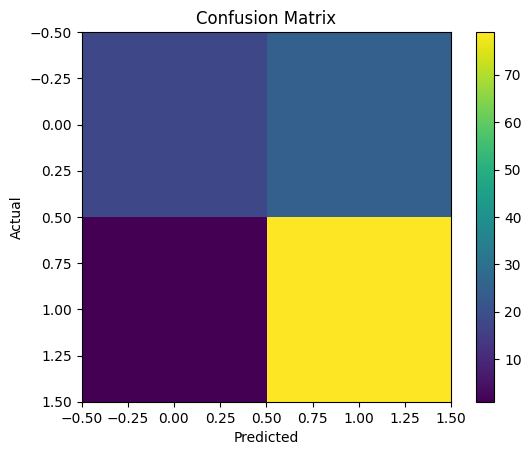

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


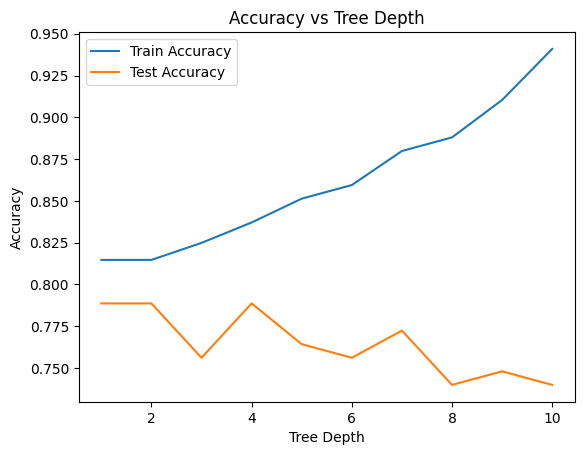

In [11]:
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Tree Depth")
plt.show()

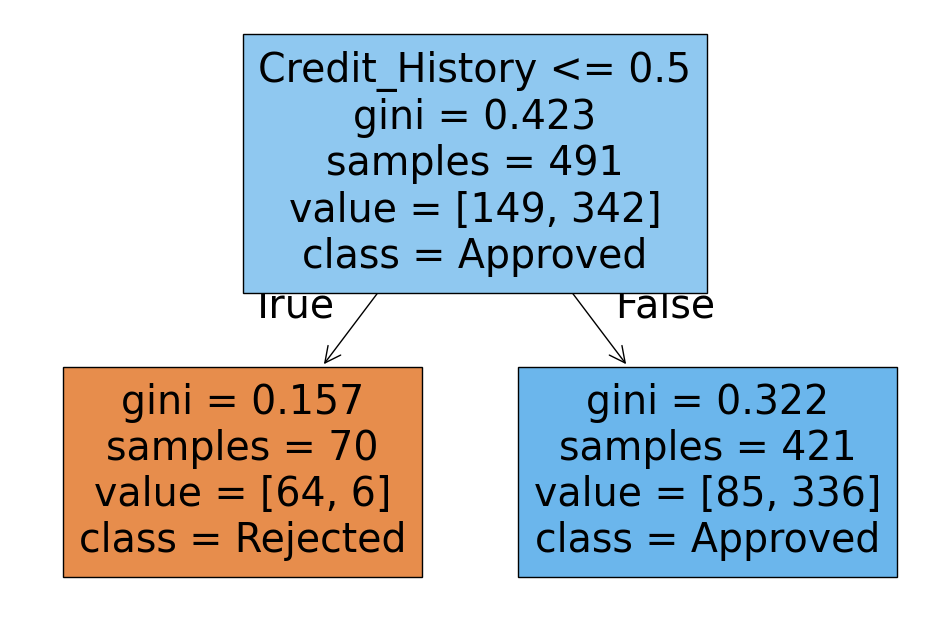

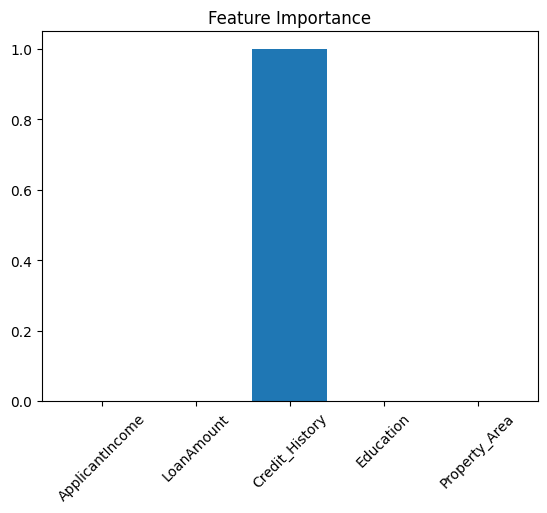

In [12]:
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=["Rejected","Approved"], filled=True)
plt.show()

plt.bar(X.columns, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()